In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from astropy.time import Time
from datetime import datetime
import pytz
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
latest_dir = "/home/advait/research/casm/vis-modelling/results_20251213_1310_to_20251214_1910"
# latest_dir = 

In [3]:
# 2. Load all visibility files and extract Source Data
vis_files = sorted(glob.glob(os.path.join(latest_dir, "visibilities", "*.npz")))
print(f"Found {len(vis_files)} visibility files")

data_list = []
times = []
sun_alts = []

# Assuming baselines and freqs are constant, load them from first file
first_data = np.load(vis_files[0])
baselines = first_data['baselines']
frequencies = first_data['frequencies']
baseline_pairs = first_data['baseline_pairs']

# Extract indices for the 3 test baselines
idx_auto = 0
idx_ew = 1 
idx_ns = 2

srcs = {}
srcs['Cas A'] = {'alt': [], 'az': []}
srcs['Cyg A'] = {'alt': [], 'az': []}
srcs['Tau A'] = {'alt': [], 'az': []}
srcs['Sun'] = {'alt': [], 'az': []}

pst = pytz.timezone('US/Pacific')

for f in vis_files:
    d = np.load(f)
    # Shape: (n_baselines, n_freq, 2, 2)
    vis = d['visibilities']
    t_iso = str(d['time_obs'])
    t_pst = Time(t_iso).to_datetime(timezone=pst)
    
    data_list.append(vis)
    times.append(t_pst)
    
    # Extract Source Altitudes
    src_names = d['source_names']
    src_alt = d['source_alt']
    
    for src in srcs.keys():

        src_idx = np.where(src_names == src)[0][0]
        srcs[src]['alt'].append(src_alt[src_idx])
        srcs[src]['az'].append(src_alt[src_idx])


# Stack into arrays
vis_array = np.array(data_list)
sun_alts = np.array(sun_alts)
print(f"Data shape: {vis_array.shape}")

Found 3600 visibility files
Data shape: (3600, 1, 500, 2, 2)


/tmp/ipykernel_89817/3683379999.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


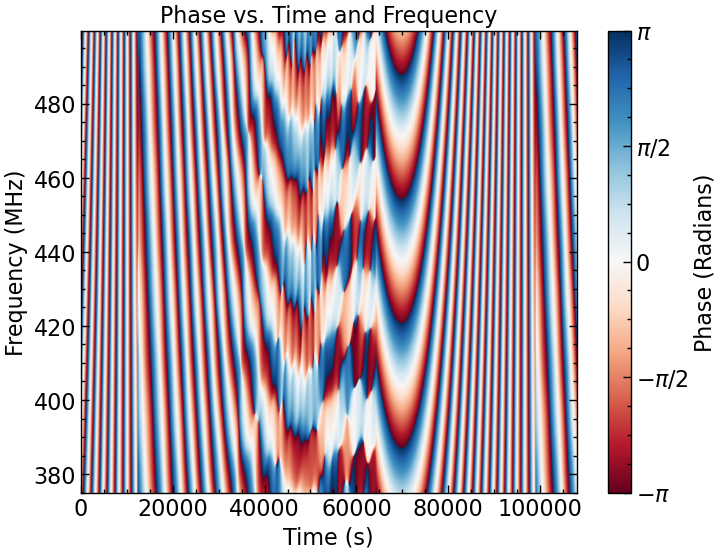

In [4]:
# 4. Plot Phase vs Time with Sun Altitude
# phase_ew = np.angle(vis_array[:, idx_ew, :, 0, 0])
phase_ns = np.angle(vis_array[:, 0, :, 0, 0])

# time axis has 1 mins per step, convert to s
# time_axis = np.arange(vis_array.shape[0]) * 60 * 1
time_axis = np.arange(vis_array.shape[0]) * 60 * 0.5


# freq axis is from 375 to 468 MHz with 100 channels
frequency_axis = np.arange(vis_array.shape[2]) * (500 - 375) / 500 + 375

fig, ax1 = plt.subplots(figsize=(8, 6))

# Stored the output of imshow in 'im' to use it for the colorbar
im = ax1.imshow(
    phase_ns.T, 
    aspect='auto', 
    cmap='RdBu', 
    extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]], # Flipped y-axis for proper imshow orientation
    vmin=-np.pi,
    vmax=np.pi,
    origin="lower"
)

ax1.set_ylabel('Frequency (MHz)')
ax1.set_xlabel('Time (s)')
ax1.set_title('Phase vs. Time and Frequency')


cbar = plt.colorbar(im, ax=ax1, orientation='vertical', pad=0.05)
cbar.set_label('Phase (Radians)')
cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])


plt.legend()
plt.show()

# Plot Phases


/tmp/ipykernel_89817/4120062421.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


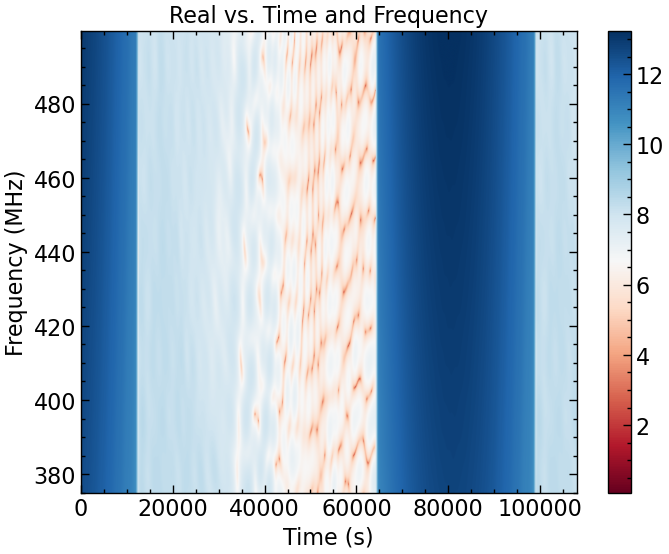

In [5]:
# 4. Plot Phase vs Time with Sun Altitude
# phase_ew = np.angle(vis_array[:, idx_ew, :, 0, 0])
abs_ns = np.absolute(vis_array[:, 0, :, 0, 0])

# time axis has 1 mins per step, convert to s
# time_axis = np.arange(vis_array.shape[0]) * 60 * 1
time_axis = np.arange(vis_array.shape[0]) * 60 * 0.5


# freq axis is from 375 to 468 MHz with 100 channels
frequency_axis = np.arange(vis_array.shape[2]) * (500 - 375) / 500 + 375

fig, ax1 = plt.subplots(figsize=(8, 6))

# Stored the output of imshow in 'im' to use it for the colorbar
im = ax1.imshow(
    np.log(abs_ns.T), 
    aspect='auto', 
    cmap='RdBu', 
    extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]], # Flipped y-axis for proper imshow orientation
    origin="lower"
)

ax1.set_ylabel('Frequency (MHz)')
ax1.set_xlabel('Time (s)')
ax1.set_title('Real vs. Time and Frequency')
# ax1.set_xlim([17e3, 60e3])


cbar = plt.colorbar(im, ax=ax1, orientation='vertical', pad=0.05)
# cbar.set_label('Phase (Radians)')
# cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])


plt.legend()
plt.show()

# Plot Phases


In [6]:
frequency_axis.shape

(500,)

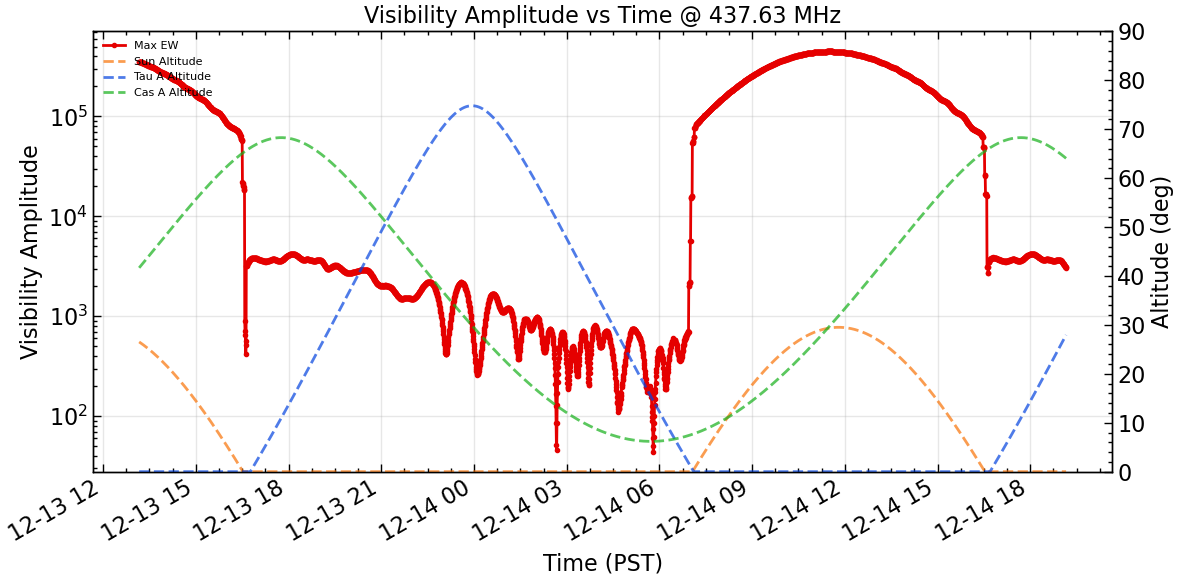

In [7]:
# 3. Plot Amplitude vs Time with Sun Altitude
mid_freq_idx = len(frequencies) // 2
freq_mhz = frequencies[mid_freq_idx]

amp_auto = np.abs(vis_array[:, idx_auto, mid_freq_idx, 0, 0])
amp_ew = np.abs(vis_array[:, 0, mid_freq_idx, 0, 0])
# amp_ns = np.abs(vis_array[:, idx_ns, mid_freq_idx, 0, 0])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Visibilities on Left Axis
# ax1.plot(times, amp_auto, label=f'Auto (Ant 0)', marker='.', color='C0')
ax1.plot(times, amp_ew, label=f'Max EW', marker='.', color='xkcd:red')
# ax1.plot(times, amp_ns, label=f'Max NS', marker='.', color='xkcd:azure')
ax1.set_xlabel('Time (PST)')
ax1.set_ylabel('Visibility Amplitude', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(times, srcs['Sun']['alt'], label='Sun Altitude', color='xkcd:orange', linestyle='--', linewidth=2, alpha=0.7)
ax2.plot(times, srcs['Tau A']['alt'], label='Tau A Altitude', color='xkcd:blue', linestyle='--', linewidth=2, alpha=0.7)
ax2.plot(times, srcs['Cas A']['alt'], label='Cas A Altitude', color='xkcd:green', linestyle='--', linewidth=2, alpha=0.7)
# ax2.plot(times, srcs['Cyg A']['alt'], label='Cyg A Altitude', color='xkcd:red', linestyle='--', linewidth=2, alpha=0.7)
ax2.set_ylabel('Altitude (deg)')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 90)  # Standard horizon to zenith

# Valid time formatting
fig.autofmt_xdate()

plt.title(f'Visibility Amplitude vs Time @ {freq_mhz:.2f} MHz')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize = 8)

plt.tight_layout()
plt.show()

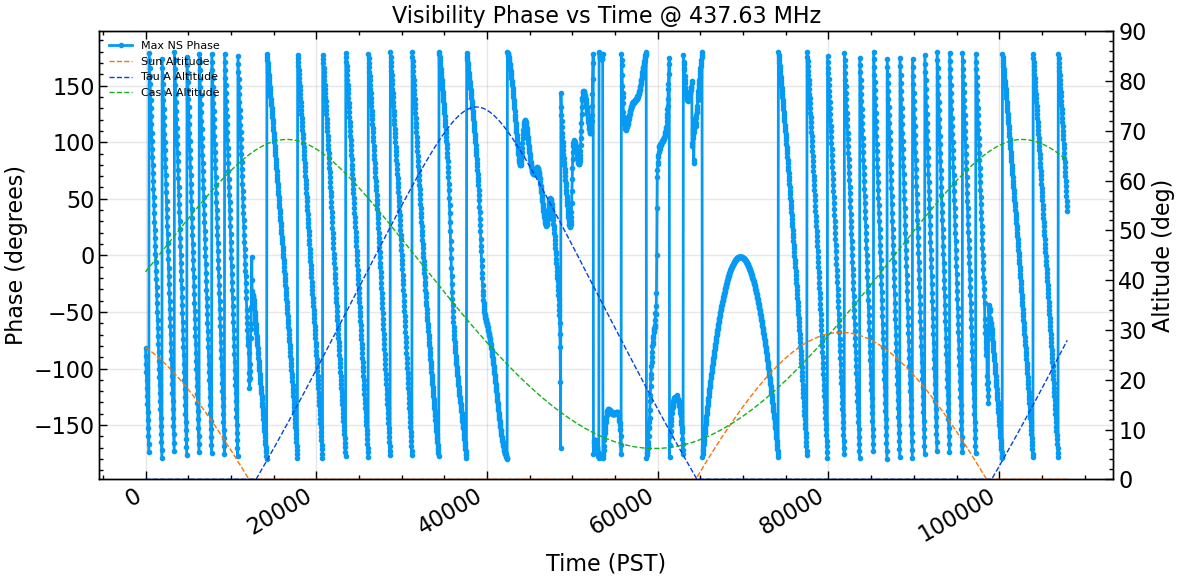

In [8]:
# 4. Plot Phase vs Time with Sun Altitude
# phase_ew = np.angle(vis_array[:, idx_ew, mid_freq_idx, 0, 0])
phase_ns = np.angle(vis_array[:, 0, mid_freq_idx, 0, 0])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Phases
# ax1.plot(times, np.degrees(phase_ew), label='Max EW Phase', marker='.', color='xkcd:red', lw = 2)
ax1.plot(time_axis, np.degrees(phase_ns), label='Max NS Phase', marker='.', color='xkcd:azure', lw = 2)
ax1.set_xlabel('Time (PST)')
ax1.set_ylabel('Phase (degrees)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(time_axis, srcs['Sun']['alt'], label='Sun Altitude', color='xkcd:orange', linestyle='--', linewidth=1, alpha=1)
ax2.plot(time_axis, srcs['Tau A']['alt'], label='Tau A Altitude', color='xkcd:blue', linestyle='--', linewidth=1, alpha=1)
ax2.plot(time_axis, srcs['Cas A']['alt'], label='Cas A Altitude', color='xkcd:green', linestyle='--', linewidth=1, alpha=1)
ax2.set_ylabel('Altitude (deg)')

ax2.tick_params(axis='y')
ax2.set_ylim(0, 90)

fig.autofmt_xdate()
plt.title(f'Visibility Phase vs Time @ {freq_mhz:.2f} MHz')

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

In [9]:
realvis = np.load("../TwoElement_vis_december13.npy")
t = np.load("../TwoElement_MJD.npy")

In [10]:
realvis.shape, t.shape

((4096, 3855), (3855,))

/tmp/ipykernel_89817/3807844951.py:8: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 2 Axes> than <Figure size 800x600 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)


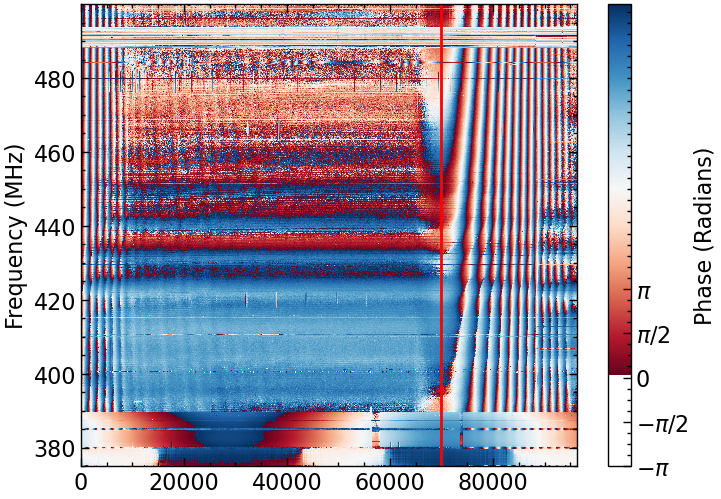

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
frequency_axis_real = np.arange(4096) * (500 - 375) / 4096 + 375
realt_s = (t-t[0])*3600*24
raw_vis = realvis[::-1,:]
pc = ax.pcolormesh(realt_s, frequency_axis_real, np.angle(raw_vis), cmap='RdBu')
ax.axvline(70000, color='r')
ax.set_ylabel('Frequency (MHz)')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Phase (Radians)')
cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

Text(0.5, 0, 'Time (s)')

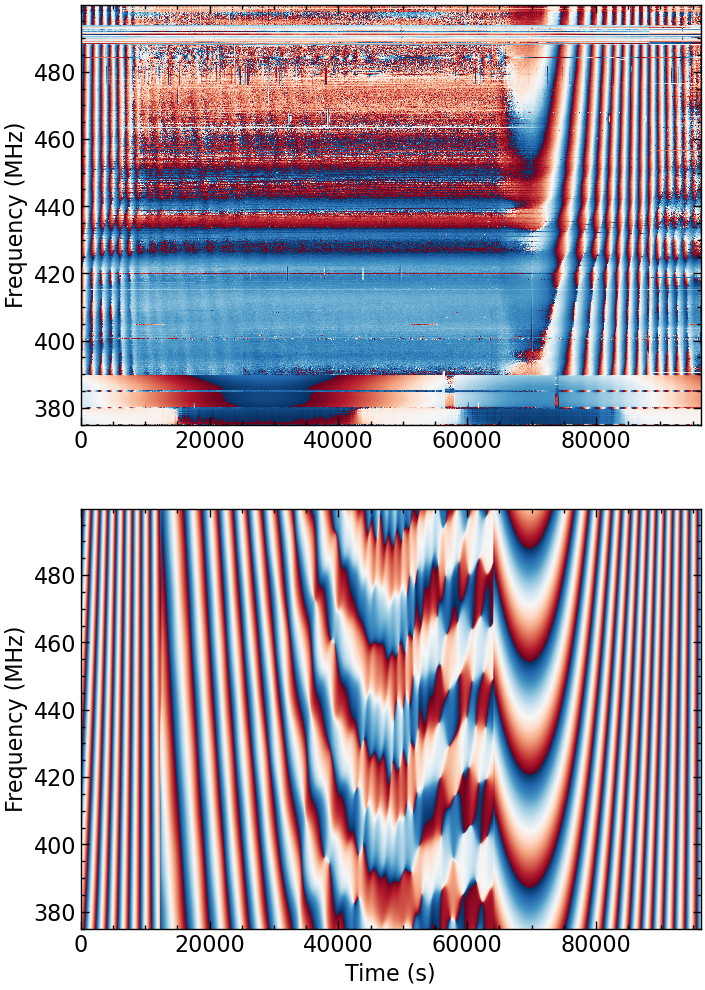

In [12]:
# 4. Plot Phase vs Time with Sun Altitude
# phase_ew = np.angle(vis_array[:, idx_ew, :, 0, 0])
model_vis = vis_array[:, 0, :, 0, 0].T
model_phase = np.angle(model_vis)

fig, (ax,ax1) = plt.subplots(2,1,figsize=(8, 12))

# Stored the output of imshow in 'im' to use it for the colorbar
im = ax1.imshow(
    model_phase, 
    aspect='auto', 
    cmap='RdBu', 
    extent=[time_axis[0], time_axis[-1], frequency_axis[0], frequency_axis[-1]], # Flipped y-axis for proper imshow orientation
    vmin=-np.pi,
    vmax=np.pi,
    origin="lower"
)

ax1.set_ylabel('Frequency (MHz)')
# ax1.set_title('Phase vs. Time and Frequency')
ax1.set_xlim([0,realt_s[-1]])
# ax1.axvline(70000, color='r')


# cbar = plt.colorbar(im, ax=ax1, orientation='vertical', pad=0.05)
# cbar.set_label('Phase (Radians)')
# cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

pc = ax.pcolormesh(realt_s, frequency_axis_real, np.angle(raw_vis), cmap='RdBu', antialiased=True)
# ax.axvline(70000, color='r')
ax.set_ylabel('Frequency (MHz)')
# cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
# cbar.set_label('Phaseadians)')
# cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

# ax2.plot(time_axis, srcs['Sun']['alt'], label='Sun Altitude', color='xkcd:orange', linestyle='--', linewidth=1, alpha=1)
# ax2.plot(time_axis, srcs['Tau A']['alt'], label='Tau A Altitude', color='xkcd:blue', linestyle='--', linewidth=1, alpha=1)
# ax2.plot(time_axis, srcs['Cas A']['alt'], label='Cas A Altitude', color='xkcd:green', linestyle='--', linewidth=1, alpha=1)
# ax2.set_xlim([0,realt_s[-1]])

ax2.set_ylabel('Altitude (deg)')
ax1.set_xlabel('Time (s)')
# ax2.legend()
# plt.tight_layout()


In [13]:
from scipy.interpolate import interp1d

vis_interpolator = interp1d(
    time_axis, 
    model_vis, 
    kind='linear', 
    axis=1, 
    fill_value="extrapolate"
)

model_vis_interp = vis_interpolator(realt_s)

print(f"Original model_vis shape: {model_vis.shape}")
print(f"Interpolated model_vis shape: {model_vis_interp.shape}")

vis_interpolator_f = interp1d(
    frequency_axis, 
    model_vis_interp, 
    kind='linear', 
    axis=0, 
    fill_value="extrapolate"
)

model_vis_interp = vis_interpolator_f(frequency_axis_real)
model_phase_interp = np.angle(model_vis_interp)

Original model_vis shape: (500, 3600)
Interpolated model_vis shape: (500, 3855)


In [22]:
raw_vis_model_shift = raw_vis * np.exp(1j * model_phase_interp)

Text(0.5, 0, 'Time (s)')

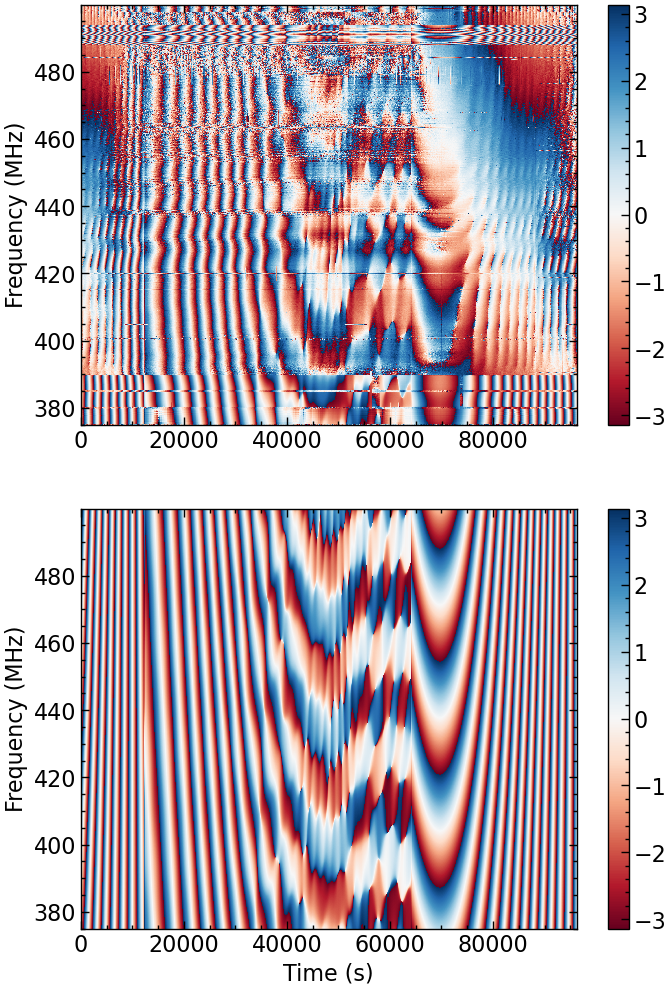

In [23]:
# 4. Plot Phase vs Time with Sun Altitude
# phase_ew = np.angle(vis_array[:, idx_ew, :, 0, 0])

fig, (ax,ax1) = plt.subplots(2,1,figsize=(8, 12))

# Stored the output of imshow in 'im' to use it for the colorbar
pc = ax.pcolormesh(realt_s, frequency_axis_real, np.angle(raw_vis_model_shift), cmap='RdBu', antialiased=True)


ax.set_ylabel('Frequency (MHz)')
ax.set_xlim([0,realt_s[-1]])


cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.05)
# cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

pc = ax1.pcolormesh(realt_s, frequency_axis_real, model_phase_interp, cmap='RdBu', antialiased=True)
# ax.axvline(70000, color='r')
ax1.set_ylabel('Frequency (MHz)')
cbar2 = plt.colorbar(pc, ax=ax1, orientation='vertical', pad=0.05)
# cbar2.set_ticks(cb])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
ax1.set_xlabel('Time (s)')
# ax2.legend()
# plt.tight_layout()

Text(0.5, 0, 'Time (s)')

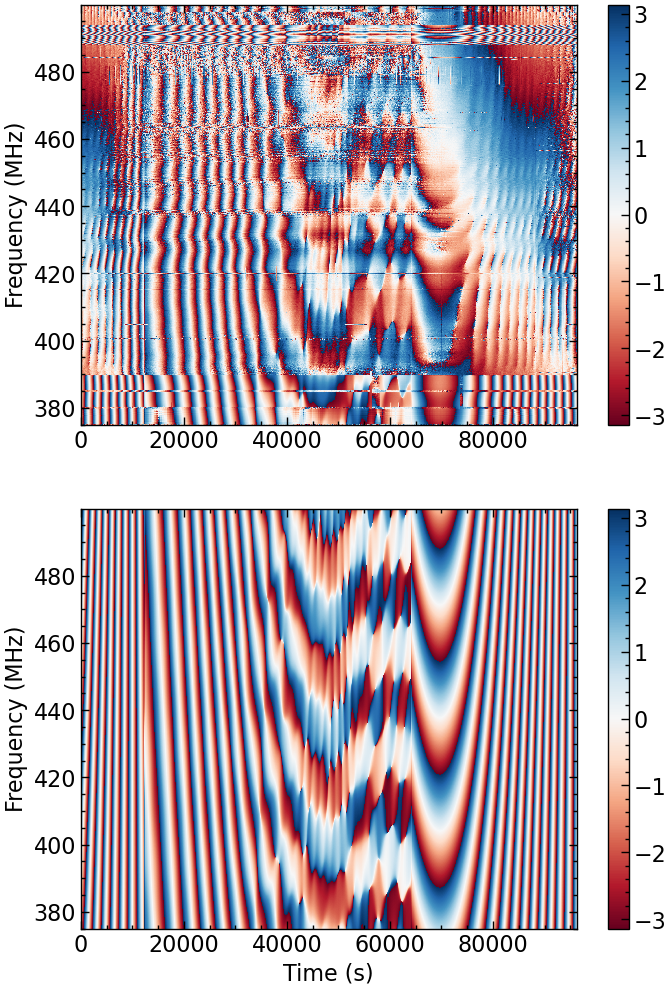

In [25]:
# 4. Plot Phase vs Time with Sun Altitude
# phase_ew = np.angle(vis_array[:, idx_ew, :, 0, 0])

fig, (ax,ax1) = plt.subplots(2,1,figsize=(8, 12))

# Stored the output of imshow in 'im' to use it for the colorbar
pc = ax.pcolormesh(realt_s, frequency_axis_real, np.angle(raw_vis_model_shift), cmap='RdBu', antialiased=True)


ax.set_ylabel('Frequency (MHz)')
ax.set_xlim([0,realt_s[-1]])


cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.05)
# cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

pc = ax1.pcolormesh(realt_s, frequency_axis_real, model_phase_interp, cmap='RdBu', antialiased=True)
# ax.axvline(70000, color='r')
ax1.set_ylabel('Frequency (MHz)')
cbar2 = plt.colorbar(pc, ax=ax1, orientation='vertical', pad=0.05)
# cbar2.set_ticks(cb])
# cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
ax1.set_xlabel('Time (s)')
# ax2.legend()
# plt.tight_layout()


In [27]:
frequency_axis_real[2900]

np.float64(463.5009765625)

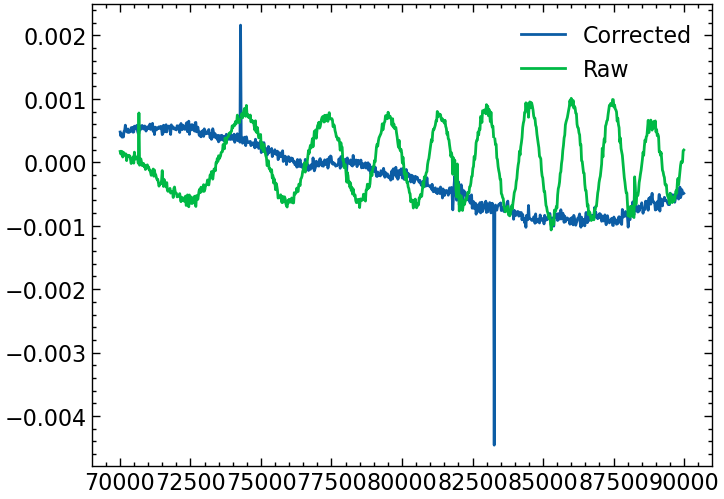

In [28]:
sun_mask = (realt_s>30e3) & (realt_s<60e3)
sun_mask = (realt_s>70e3) & (realt_s<90e3)

f = 2900
from astropy.stats import sigma_clip
sun_vis_raw = realvis[::-1,sun_mask]
sun_vis_raw = sigma_clip(sun_vis_raw[f,:], sigma=3.0)

sun_vis_corrected = sigma_clip(raw_vis_model_shift[f,sun_mask], sigma=3.0)

plt.plot(realt_s[sun_mask] , np.real(sun_vis_corrected), label = "Corrected")
plt.plot(realt_s[sun_mask] , np.real(sun_vis_raw), label = 'Raw')
plt.legend()

NameError: name 'f_mask' is not defined

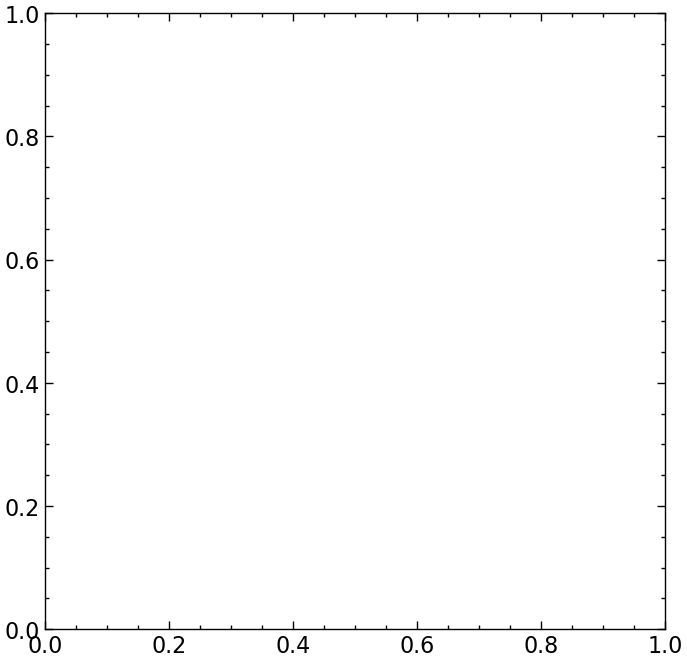

In [29]:
sun_vis_raw = realvis[::-1,sun_mask]
sun_vis_corrected = raw_vis_model_shift[:,sun_mask]
sun_t = realt_s[sun_mask]

fig, ax = plt.subplots(1,1,figsize=(8, 8))
pc = ax.pcolormesh(sun_t, frequency_axis_real[f_mask], np.angle(sun_vis_raw[f_mask,:]), cmap='RdBu', antialiased=True)
ax.set_ylabel('Frequency (MHz)')

NameError: name 'f_mask' is not defined

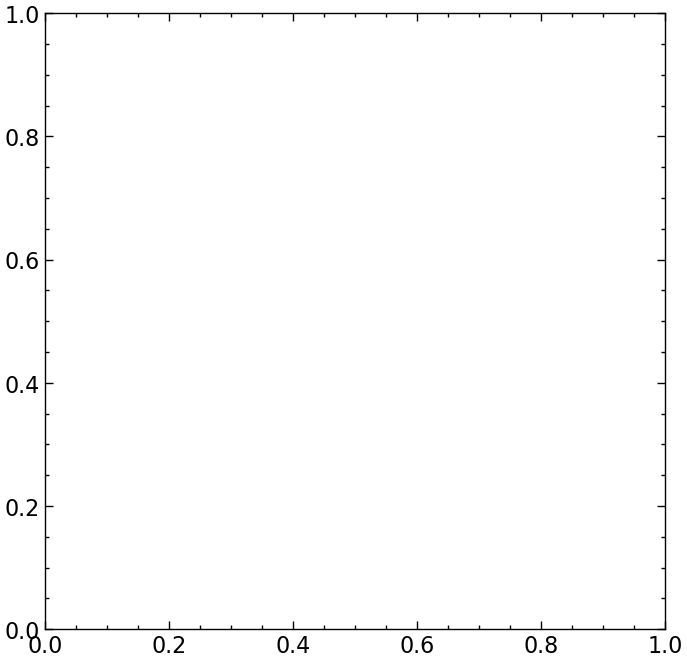

In [30]:
sun_vis_raw = realvis[::-1,sun_mask]
sun_vis_corrected = raw_vis_model_shift[:,sun_mask]
sun_t = realt_s[sun_mask]

fig, ax = plt.subplots(1,1,figsize=(8, 8))
pc = ax.pcolormesh(sun_t, frequency_axis_real[f_mask], np.log(np.absolute(sun_vis_raw[f_mask,:])), cmap='inferno', antialiased=True)
cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.05)
ax.set_ylabel('Frequency (MHz)')

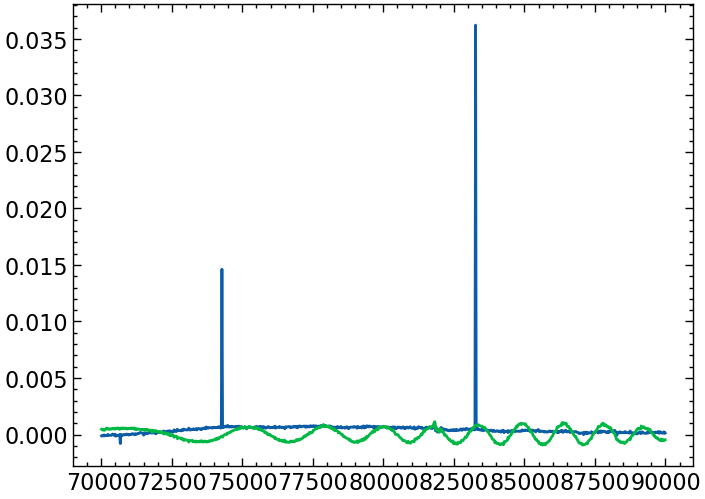

In [31]:
f = 2900
from astropy.stats import sigma_clip
sun_vis_raw = realvis[::-1,sun_mask]
sun_vis_raw = sigma_clip(sun_vis_raw[f,:], sigma=3.0)

sun_vis_corrected = sigma_clip(raw_vis_model_shift[f,sun_mask], sigma=3.0)

plt.plot(realt_s[sun_mask] , np.imag(sun_vis_corrected))
plt.plot(realt_s[sun_mask] , np.imag(sun_vis_raw))

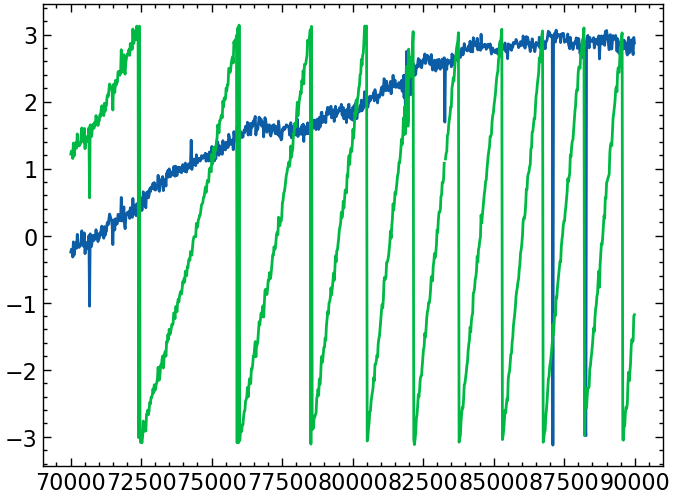

In [32]:
plt.plot(realt_s[sun_mask] , np.angle(sun_vis_corrected[:]))
plt.plot(realt_s[sun_mask] , np.angle(sun_vis_raw[:]))

In [33]:
sun_vis_raw = realvis[::-1,sun_mask]
sun_vis_corrected = raw_vis_model_shift[:,sun_mask]
sun_t = realt_s[sun_mask]

Text(0, 0.5, 'Frequency (MHz)')

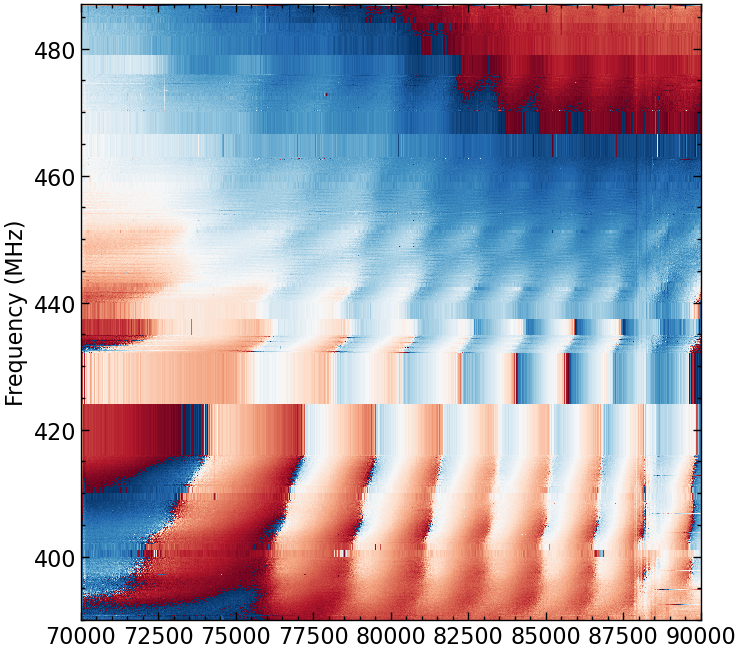

In [36]:
# 4. Plot Phase vs Time with Sun Altitude
# phase_ew = np.angle(vis_array[:, idx_ew, :, 0, 0])

fig, ax = plt.subplots(1,1,figsize=(8, 8))
# pc = ax.pcolormesh(sun_t, frequency_axis_real[f_mask], np.angle(sun_vis_corrected[f_mask,:]), cmap='RdBu', antialiased=True)

# Stored the output of imshow in 'im' to use it for the colorbar
f_mask = (frequency_axis_real > 375) & (frequency_axis_real < 500)
bad_freqs = [[375, 390], [400,402], [409,411], [436, 438], [451,452], [463,465], [467,469], [483,485], [487, 500]
            ,[400,402], [409,411], [442,443], [472,473], [463, 470], [416,425], [425,432], [435,440], [476,482], [458,460]]
for f in bad_freqs:
    # ax.axhspan(f[0], f[1], color='gray', alpha=0.5)
    f_mask &= ~((frequency_axis_real >= f[0]) & (frequency_axis_real <= f[1]))
pc = ax.pcolormesh(sun_t, frequency_axis_real[f_mask], np.angle(sun_vis_corrected[f_mask,:]), cmap='RdBu', antialiased=True)


f_mask &= (frequency_axis_real > 440) & (frequency_axis_real < 485)

# bad_freqs2 = [[400,402], [409,411], [442,443], [472,473], [463, 470], [418,421], [425,432], [435,440], [476,482]]
# for f in bad_freqs2:
    # ax.axhspan(f[0], f[1], color='gray', alpha=0.2)
    # f_mask &= ~((frequency_axis_real >= f[0]) & (frequency_axis_real <= f[1]))

ax.set_ylabel('Frequency (MHz)')

# ax.axvspan(sun_t[600], sun_t[800], color='k', alpha=0.5)
# ax.set_xlim([0,realt_s[-1]])


# cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.05)
# # cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# # cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

# pc = ax1.pcolormesh(sun_t, frequency_axis_real, np.angle(sun_vis_raw), cmap='RdBu', antialiased=True)
# # ax.axvline(70000, color='r')
# ax1.set_ylabel('Frequency (MHz)')
# cbar2 = plt.colorbar(pc, ax=ax1, orientation='vertical', pad=0.05)
# # cbar2.set_ticks(cb])
# # cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# ax1.set_xlabel('Time (s)')
# ax2.legend()
# plt.tight_layout()


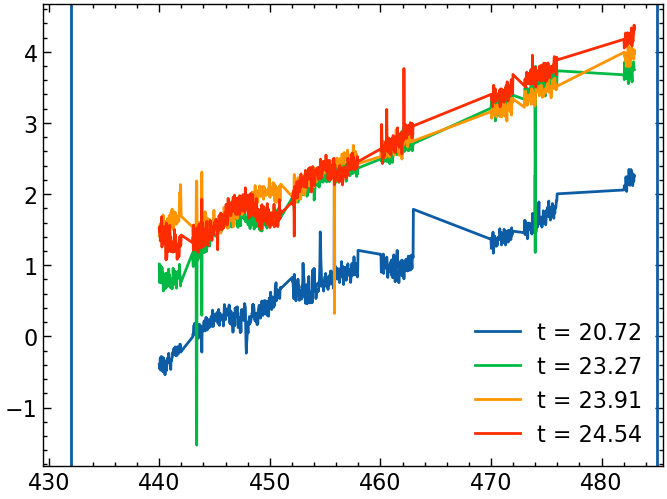

In [37]:
# f_mask = (frequency_axis_real > 390) & (frequency_axis_real < 480)
# exclusion_mask = (frequency_axis_real < 420) | \
#                  (frequency_axis_real > 450)
# f_mask = f_mask & exclusion_mask

ts = 200
plt.plot(frequency_axis_real[f_mask], np.unwrap(np.angle(sun_vis_corrected[f_mask, ts])), label = f't = {(sun_t[ts]/3600).round(2)}')

ts = 600
plt.plot(frequency_axis_real[f_mask], np.unwrap(np.angle(sun_vis_corrected[f_mask, ts])), label = f't = {(sun_t[ts]/3600).round(2)}')


ts = 700
plt.plot(frequency_axis_real[f_mask], np.unwrap(np.angle(sun_vis_corrected[f_mask, ts])), label = f't = {(sun_t[ts]/3600).round(2)}')

ts = 800
plt.plot(frequency_axis_real[f_mask], np.unwrap(np.angle(sun_vis_corrected[f_mask, ts])), label = f't = {(sun_t[ts]/3600).round(2)}')

plt.axvline(432)
plt.axvline(485)
# ts = 900
# plt.plot(frequency_axis_real[f_mask], np.unwrap(np.angle(sun_vis_corrected[f_mask, ts]), discont = 1.5*np.pi), label = f't = {(sun_t[ts]/3600).round(2)}')
plt.legend()

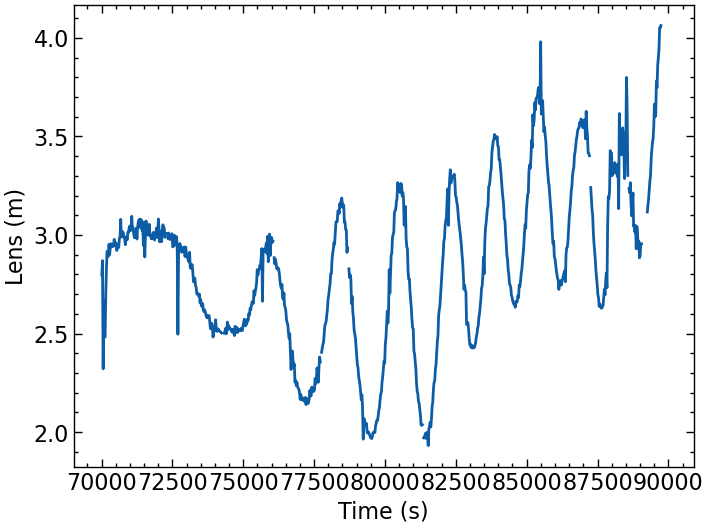

In [38]:
lens = []

for t in range(len(sun_t)):
    p = np.polyfit(frequency_axis_real[f_mask]*1e6, np.unwrap(np.angle(sun_vis_corrected[f_mask, t])), 1)
    lens.append(p[0]*3e8/(2*np.pi))

lens = np.array(lens)
lens_clip = sigma_clip(lens, sigma=3, maxiters=5)

plt.plot(sun_t, lens_clip)
plt.xlabel('Time (s)')
plt.ylabel('Lens (m)')
plt.show()

2.8996507401237235 0.9212051212353514


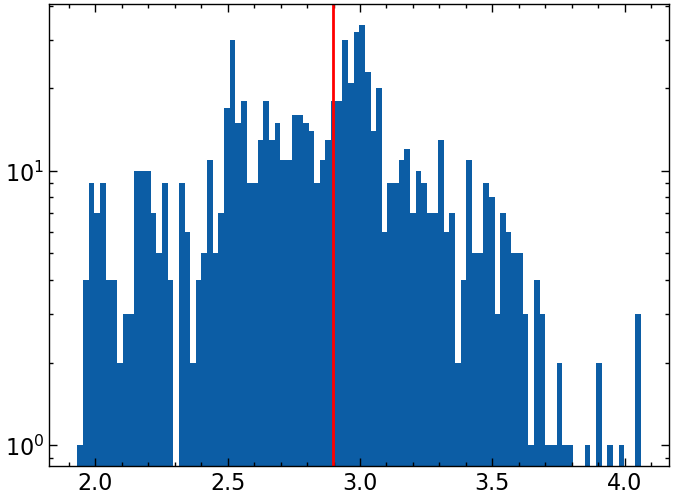

In [39]:
lens = lens[lens>0]
plt.hist(lens_clip, bins=100);
plt.axvline(np.median(lens), color='r' )
plt.yscale('log')
print(np.median(lens), np.std(lens))

In [40]:
path = np.median(lens)
def path_to_phase_differential(path, f_mhz, f0_mhz=375):
    """
    Phase relative to reference frequency f0.
    """
    f_hz = f_mhz * 1e6
    f0_hz = f0_mhz * 1e6
    phase_diff = 2 * np.pi * path * (f_hz - f0_hz) / 3e8
    return phase_diff

In [41]:
path_to_phase_differential(path, 500)

np.float64(7.5912678859574125)

In [50]:
delay_phases = path_to_phase_differential(path, frequency_axis_real)
delay_phases.shape, raw_vis.shape

((4096,), (4096, 3855))

In [56]:
delay_phase_full = delay_phases_stacked = np.tile(delay_phases[:, np.newaxis], (1, raw_vis.shape[1]))

In [58]:
delay_correction = np.exp(-1j * delay_phase_full)
raw_vis_delay_model_shift = raw_vis_model_shift * delay_correction

Text(0, 0.5, 'Frequency (MHz)')

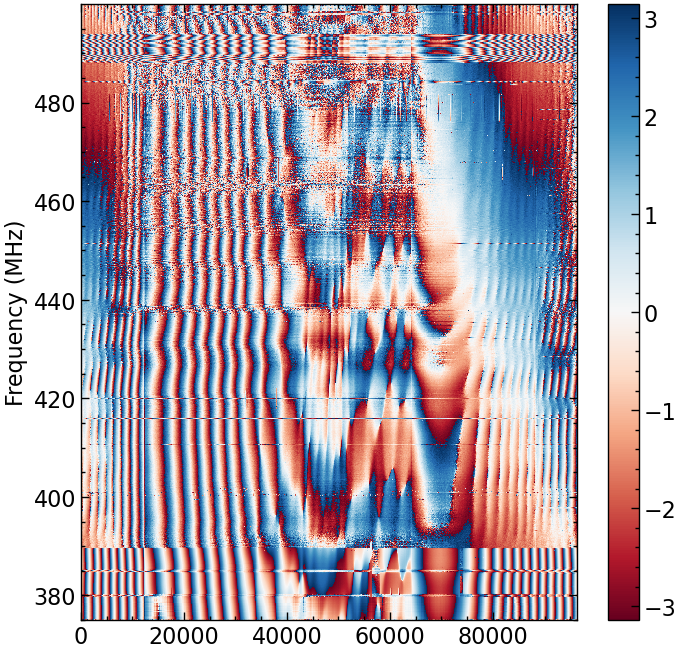

In [59]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
# pc = ax.pcolormesh(sun_t, frequency_axis_real[f_mask], np.angle(sun_vis_corrected[f_mask,:]), cmap='RdBu', antialiased=True)
pc = ax.pcolormesh(realt_s, frequency_axis_real, np.angle(raw_vis_model_shift), cmap='RdBu', antialiased=True)
cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.05)

ax.set_ylabel('Frequency (MHz)')

Text(0, 0.5, 'Frequency (MHz)')

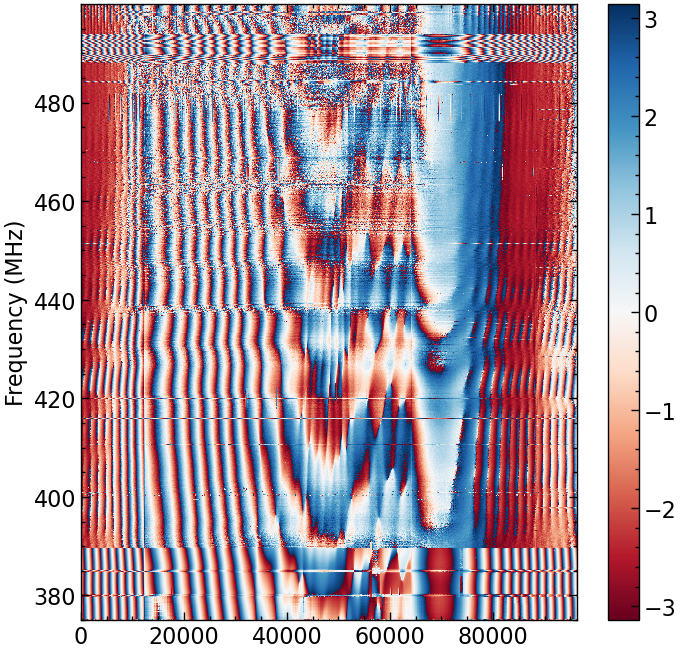

In [60]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
# pc = ax.pcolormesh(sun_t, frequency_axis_real[f_mask], np.angle(sun_vis_corrected[f_mask,:]), cmap='RdBu', antialiased=True)
pc = ax.pcolormesh(realt_s, frequency_axis_real, np.angle(raw_vis_delay_model_shift), cmap='RdBu', antialiased=True)
cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.05)

ax.set_ylabel('Frequency (MHz)')